# Predicting House Prices with Regression using TensorFlow

Task 1: Introduction

For this project, we are going to work on evaluating price of houses given the following features:

    Year of sale of the house
    The age of the house at the time of sale
    Distance from city center
    Number of stores in the locality
    The latitude
    The longitude


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline
print('Libraries imported.')

In [3]:
!pip install utils

In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

# Task 2: Importing the Data
## 2.1: Importing the Data

In [15]:
df=pd.read_excel('df.xlsx')

In [17]:
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


# 2.2: Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.



In [18]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Task 3: Data Normalization
3.1: Data Normalization

We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.

In [19]:
df = df.iloc[:,1:]

In [20]:
df.head()

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157


In [21]:
df_norm = (df-df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.220504,0.264821,1.062970,0.323168,-0.230403,-1.106239,0.314373
1,-0.162982,-1.402571,-1.178232,-0.636736,0.368046,-1.106239,-2.177568
2,1.562706,-0.029425,-0.858060,0.643136,1.564944,-1.422307,-0.471615
3,-1.121697,-0.519834,-1.178232,-0.956704,-1.427300,1.106239,-2.180917
4,1.179220,0.657149,-0.217717,0.963104,-1.128076,-0.790170,0.194912


# 3.2: Convert Label Value

Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. So, we need to convert the predicted values back to the original distribution if we want predicted prices.


In [23]:
y_mean = df['price'].mean()
y_std = df['price'].std()
def convert_label_values(pred):
    return(pred*y_std+y_mean)
print(convert_label_values(0.314373))

14263.999932211185


# Task 4: Create Training and Test Sets
4.1: Select Features

Make sure to remove the column price from the list of features as it is the label and should not be used as a feature.

In [29]:
x = df_norm.iloc[:,:6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.220504,0.264821,1.062970,0.323168,-0.230403,-1.106239
1,-0.162982,-1.402571,-1.178232,-0.636736,0.368046,-1.106239
2,1.562706,-0.029425,-0.858060,0.643136,1.564944,-1.422307
3,-1.121697,-0.519834,-1.178232,-0.956704,-1.427300,1.106239
4,1.179220,0.657149,-0.217717,0.963104,-1.128076,-0.790170


In [30]:
# 4.2: Select Labels
y = df_norm.iloc[:,6]
y.head()

0    0.314373
1   -2.177568
2   -0.471615
3   -2.180917
4    0.194912
Name: price, dtype: float64

# 4.3: Feature and Label Values

We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [33]:
x_arr = x.values
y_arr = y.values
y_arr.shape

(100,)

# 4.4: Train and Test Split

We will keep some part of the data aside as a test set. The model will not use this set during training and it will be used only for checking the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our model training.


In [45]:
x_train, x_test, y_train, y_test = train_test_split(
...     x_arr, y_arr, test_size=0.1, random_state=42)

In [46]:
x_train

array([[-0.73821066, -1.59873474, -0.53788852,  1.6030399 ,  1.26571914,
        -1.10623862],
       [-1.31343974,  0.55906675, -1.49840372, -0.63673641, -0.82885154,
         1.10623862],
       [ 0.41224751, -0.81407965, -1.49840372,  1.28307185,  1.56494352,
         1.42230679],
       [ 0.60399054, -1.69681663,  0.10245496,  1.6030399 ,  1.26571914,
         1.73837497],
       [-0.73821066, -0.02942457, -1.81857546, -0.31676836, -0.23040277,
        -1.42230679],
       [ 1.17921962,  0.65714864, -0.21771678,  0.96310381, -1.12807592,
        -0.79017044],
       [-0.73821066, -0.32367022, -0.53788852, -1.27667249, -0.23040277,
         0.47410226],
       [ 1.7544487 ,  0.65714864,  1.06297016,  1.28307185,  0.96649475,
         0.15803409],
       [ 0.41224751,  1.04947618, -0.85806025,  1.28307185,  0.06882161,
        -0.47410226],
       [-0.92995368, -1.59873474,  1.06297016,  0.64313577, -0.23040277,
        -0.79017044],
       [ 0.02876145, -0.32367022, -0.21771678,  0.

# Task 5: Create the Model
5.1: Create the Model

Let's write a function that returns an untrained model of a certain architecture.


In [47]:
def get_model():
    model = Sequential([
        Dense(10,input_shape=(6,),activation='relu'), # 10 nodes
        Dense(20,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1)
    ])
    model.compile(
        loss='mse',
        optimizer='adam'
    )
    return model
get_model().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [62]:
def mod():
    model12 = Sequential([
        Dense(10, input_shape = (5,), activation = 'relu'),
        Dense(2)
    ])
   
    return model12
mod().summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 22        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


# Task 6: Model Training
6.1: Model Training

We can use an EarlyStopping callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.


In [48]:
es_cb = EarlyStopping(monitor='val_loss',patience=5)

model = get_model()
pred_untrain = model.predict(x_test)

history = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=100,
    callbacks=[es_cb]

)

Train on 90 samples, validate on 10 samples
Epoch 1/100
90/90 [==============================] - 1s 6ms/sample - loss: 0.9261 - val_loss: 0.6746
Epoch 2/100
90/90 [==============================] - 0s 122us/sample - loss: 0.9071 - val_loss: 0.6670
Epoch 3/100
90/90 [==============================] - 0s 133us/sample - loss: 0.8895 - val_loss: 0.6630
Epoch 4/100
90/90 [==============================] - 0s 222us/sample - loss: 0.8735 - val_loss: 0.6587
Epoch 5/100
90/90 [==============================] - 0s 156us/sample - loss: 0.8588 - val_loss: 0.6570
Epoch 6/100
90/90 [==============================] - 0s 189us/sample - loss: 0.8424 - val_loss: 0.6566
Epoch 7/100
90/90 [==============================] - 0s 145us/sample - loss: 0.8268 - val_loss: 0.6570
Epoch 8/100
90/90 [==============================] - 0s 233us/sample - loss: 0.8118 - val_loss: 0.6585
Epoch 9/100
90/90 [==============================] - 0s 145us/sample - loss: 0.7974 - val_loss: 0.6596
Epoch 10/100
90/90 [===========

# 6.2: Plot Training and Validation Loss

Let's use the plot_loss helper function to take a look training and validation loss.


In [49]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

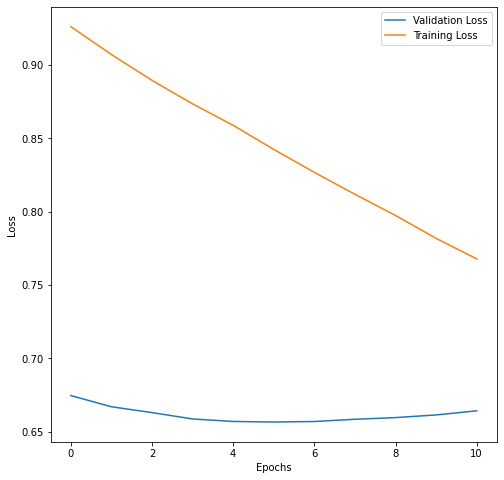

In [50]:
plot_loss(history)

# Task 7: Predictions
7.1: Plot Raw Predictions

Let's use the compare_predictions helper function to compare predictions from the model when it was untrained and when it was trained.




In [51]:
def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

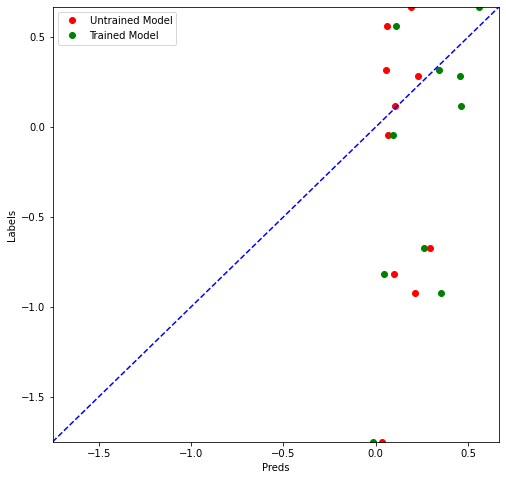

In [53]:
pred_train = model.predict(x_test)
compare_predictions(pred_untrain,pred_train,y_test)

# 7.2: Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.


C:\Users\PAVILION 2\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


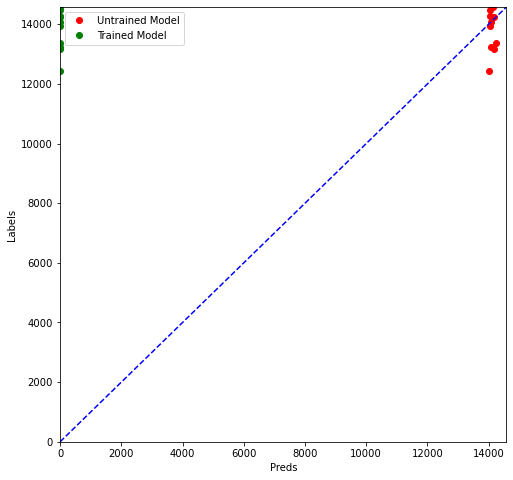

In [54]:
price_untrained = [convert_label_values(y) for y in pred_untrain]
price_trained = [convert_label_values(y) for y in pred_train]
price_test = [convert_label_values(y) for y in y_test]

compare_predictions(price_untrained,pred_train,price_test)